In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flights.csv')


In [5]:
print(df.head())

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -

<Axes: ylabel='ARRIVAL_DELAY'>

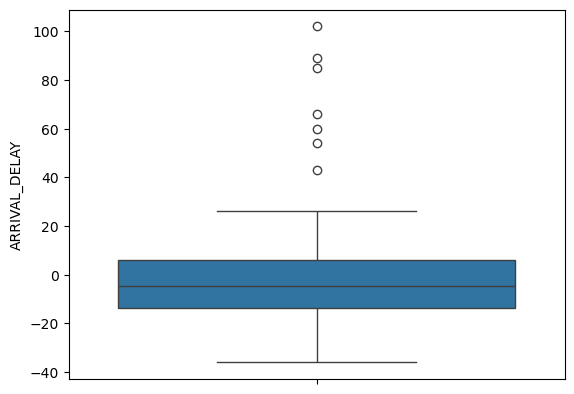

In [9]:
import seaborn as sns
df = pd.read_csv('flights.csv')
sns.boxplot(df['ARRIVAL_DELAY'])

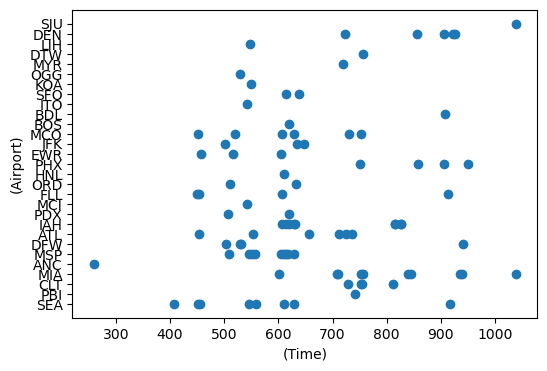

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['ARRIVAL_TIME'],df['DESTINATION_AIRPORT'])
ax.set_xlabel('(Time)')
ax.set_ylabel('(Airport)')
plt.show()

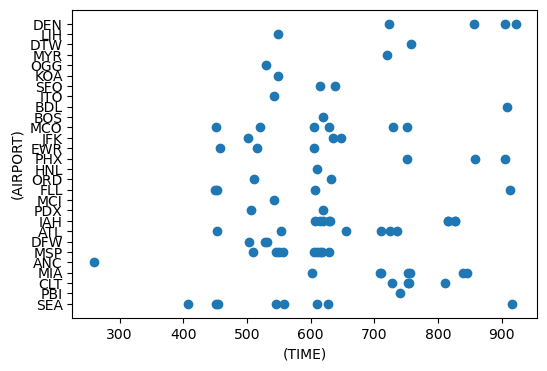

Original DataFrame Shape: (99, 31)
DataFrame Shape after Removing Outliers: (92, 31)


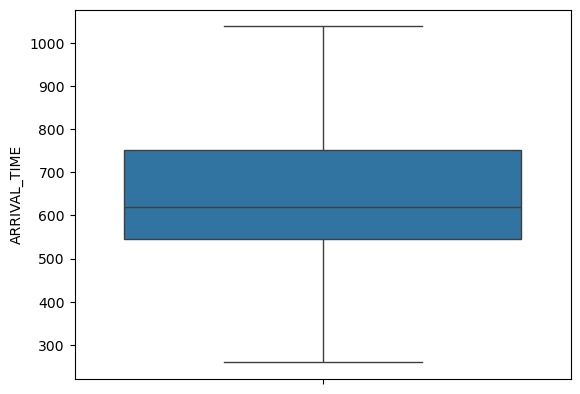

In [13]:
outlier_indices = np.where(df['ARRIVAL_TIME'] > 925.0)

no_outliers_df = df.drop(outlier_indices[0])

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(no_outliers_df['ARRIVAL_TIME'],no_outliers_df['DESTINATION_AIRPORT'])
ax.set_xlabel('(TIME)')
ax.set_ylabel('(AIRPORT)')
plt.show()

outlier_indices = np.where(df['ARRIVAL_DELAY'] > 40.0)

no_outliers_df = df.drop(outlier_indices[0])
sns.boxplot(no_outliers_df['ARRIVAL_TIME'])
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers_df.shape)

In [162]:
import scipy.stats
df = pd.read_csv('flights.csv')
df.dropna(subset=['ARRIVAL_TIME'], inplace=True)
z_scores = scipy.stats.zscore(np.abs(df['ARRIVAL_TIME']))
print(z_scores)


0    -1.659154
1     0.459598
2     0.904981
3     0.555037
4    -2.607185
        ...   
94    0.936794
95   -0.132126
96   -0.214840
97    2.355658
98   -0.342092
Name: ARRIVAL_TIME, Length: 94, dtype: float64


In [164]:
threshold_z = 2.0
outlier_indices = np.where(z_scores > threshold_z)
no_outliers = df.drop(outlier_indices[0])
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (94, 31)
DataFrame Shape after Removing Outliers: (92, 31)


In [168]:
df = pd.read_csv('flights.csv')

df .head()
print("Old Shape: ", df.shape)
Q1 = df['ARRIVAL_DELAY'].quantile(0.25)
Q3 = df['ARRIVAL_DELAY'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['ARRIVAL_DELAY'] >= upper)[0]
lower_array = np.where(df['ARRIVAL_DELAY'] <= lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (99, 31)
New Shape:  (92, 31)


94    14.0
95   -15.0
96   -25.0
97    19.0
98   -21.0
Name: ARRIVAL_DELAY, dtype: float64
94    14.333333
95     0.666667
96    -8.666667
97    -7.000000
98    -9.000000
Name: moving_average, dtype: float64


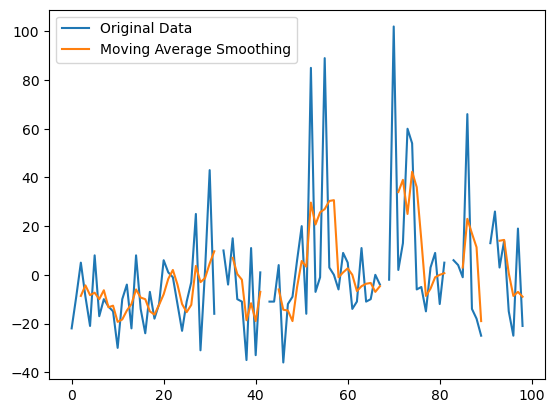

In [200]:
df['moving_average'] = df['ARRIVAL_DELAY'].rolling(window=3).mean()
print( df['ARRIVAL_DELAY'].tail())
print(df['moving_average'] .tail())
plt.plot(df['ARRIVAL_DELAY'], label='Original Data')
plt.plot(df['moving_average'], label='Moving Average Smoothing')
plt.legend()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


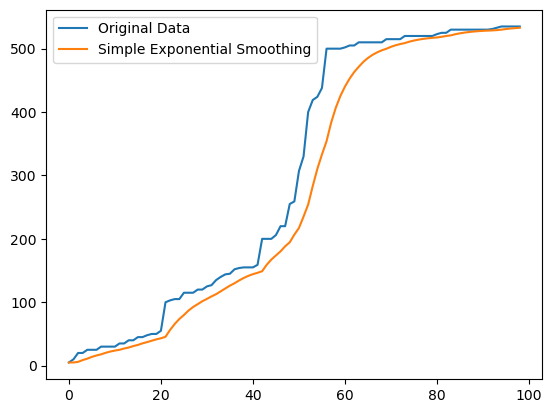

In [205]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(df['SCHEDULED_DEPARTURE']).fit(smoothing_level=0.2)
smoothed_data = model.fittedvalues
plt.plot(df['SCHEDULED_DEPARTURE'], label='Original Data')
plt.plot(smoothed_data, label='Simple Exponential Smoothing')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12584\1696242583.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('bins')['ARRIVAL_DELAY'].mean()


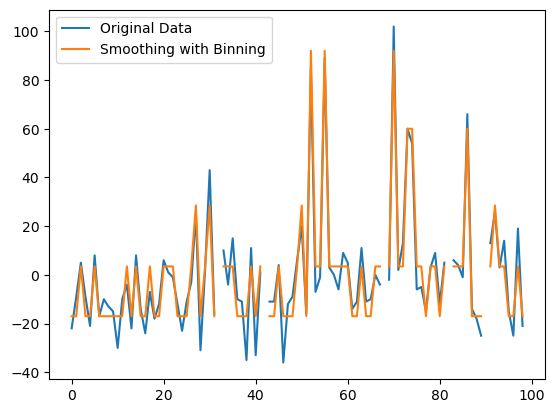

In [213]:
num_bins = 5

# Create bins using pd.cut()
df['bins'] = pd.cut(df['ARRIVAL_DELAY'], bins=num_bins)

# Calculate the mean of each bin
bin_means = df.groupby('bins')['ARRIVAL_DELAY'].mean()

# Replace values with their corresponding bin means
df['BINNING'] = df['bins'].map(bin_means)

plt.plot(df['ARRIVAL_DELAY'], label='Original Data')
plt.plot(df['BINNING'], label='Smoothing with Binning')
plt.legend()
plt.show()
df = df.drop('bins', axis=1)
df = df.drop('moving_average', axis=1)
df = df.drop('smoothed_values', axis=1)
df = df.drop('BINNING', axis=1)

In [223]:
filtered_df = df[df['FLIGHT_NUMBER'] > 100] 
filtered_df = df.query('ARRIVAL_DELAY < 40')
filtered_df = df[(df['ARRIVAL_TIME'] > 500) & (df['DESTINATION_AIRPORT'] == 'MIA')]
names = ['ANC', 'SFO']
filtered_df = df[df['ORIGIN_AIRPORT'].isin(names)]
filtered_df = df[df['AIRLINE'].str.startswith('A')]
print(filtered_df.head(10))
print(df.shape)
print(filtered_df.shape)

    YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0   2015      1    1            4      AS             98      N407AS   
1   2015      1    1            4      AA           2336      N3KUAA   
3   2015      1    1            4      AA            258      N3HYAA   
4   2015      1    1            4      AS            135      N527AS   
8   2015      1    1            4      AA           1112      N3LAAA   
11  2015      1    1            4      AA           1674      N853AA   
15  2015      1    1            4      AS            108      N309AS   
18  2015      1    1            4      AS            122      N413AS   
21  2015      1    1            4      AA            371      N3GXAA   
23  2015      1    1            4      AA            115      N3CTAA   

   ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0             ANC                 SEA                    5  ...         408.0   
1             LAX                 PBI        